In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
le1 = LabelEncoder()

In [3]:
le1.fit_transform(['Delhi', 'Ahmedabad', 'Bangalore', 'Amritsar', 'Delhi', 'Bangalore'])

array([3, 0, 2, 1, 3, 2])

In [4]:
le1.inverse_transform([0,1,2,3])

array(['Ahmedabad', 'Amritsar', 'Bangalore', 'Delhi'], dtype='<U9')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
le.fit_transform(['Bangalore', 'Hyderabad', 'Pune', 'Bangalore', 'Delhi', 'Pune'])

array([0, 2, 3, 0, 1, 3])

In [8]:
le.inverse_transform([0,1,2,3,2,3])

array(['Bangalore', 'Delhi', 'Hyderabad', 'Pune', 'Hyderabad', 'Pune'],
      dtype='<U9')

In [9]:
le_gender = LabelEncoder()

In [10]:
le_gender.fit_transform(['Male', 'Female', 'Male'])

array([1, 0, 1])

In [11]:
le_gender.inverse_transform([0,1,1,0])

array(['Female', 'Male', 'Male', 'Female'], dtype='<U6')

In [12]:
abc = le_gender.fit(['Male', 'Female'])
abc

LabelEncoder()

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv')

In [15]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
churn_df.shape

(10000, 14)

In [17]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
le = LabelEncoder()

In [19]:
churn_df['Geography'] = le.fit_transform(churn_df['Geography'])
churn_df['Gender'] = le.fit_transform(churn_df['Gender'])
churn_df['Surname'] = le.fit_transform(churn_df['Surname'])
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [20]:
from sklearn.feature_selection import chi2

In [21]:
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']

In [22]:
categorical_columns = ['Surname', 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [23]:
chi_scores = chi2(X,y)

In [24]:
chi_scores

(array([4.57638152e+03, 1.28730837e+02, 5.56133225e+02, 1.05403468e+02,
        1.18532506e+01, 5.15399263e+01, 2.30041748e+03, 3.27053797e+00,
        7.15130278e+06, 5.05539429e+00, 1.50040970e-01, 1.18199414e+02,
        4.83508818e+04]),
 array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
        5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
        0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
        0.00000000e+000]))

In [25]:
X.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [26]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending=False, inplace=True)

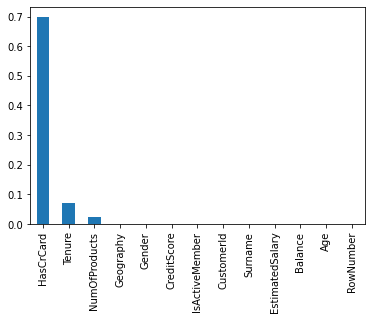

In [34]:
p_values.plot.bar()

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/RoyMachineLearning/Suicide-Rates-Overview-1985-to-2016/master/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [29]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [30]:
df.shape

(27820, 12)

In [31]:
df.isna().sum()/df.shape[0]

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country-year          0.000000
HDI for year          0.699353
 gdp_for_year ($)     0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
dtype: float64

In [32]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


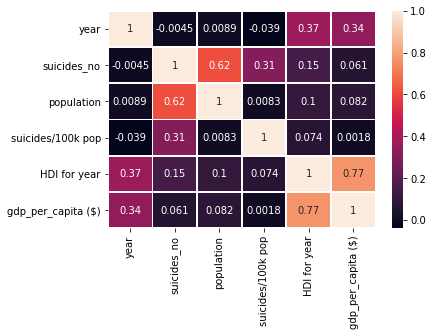

In [33]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns, 
            yticklabels=pearsoncorr.columns, 
            annot=True, 
            linewidth=0.9)